# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])


# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Plot C1-5 to evaluate stability

Text(0.5, 0, 'Time [s]')

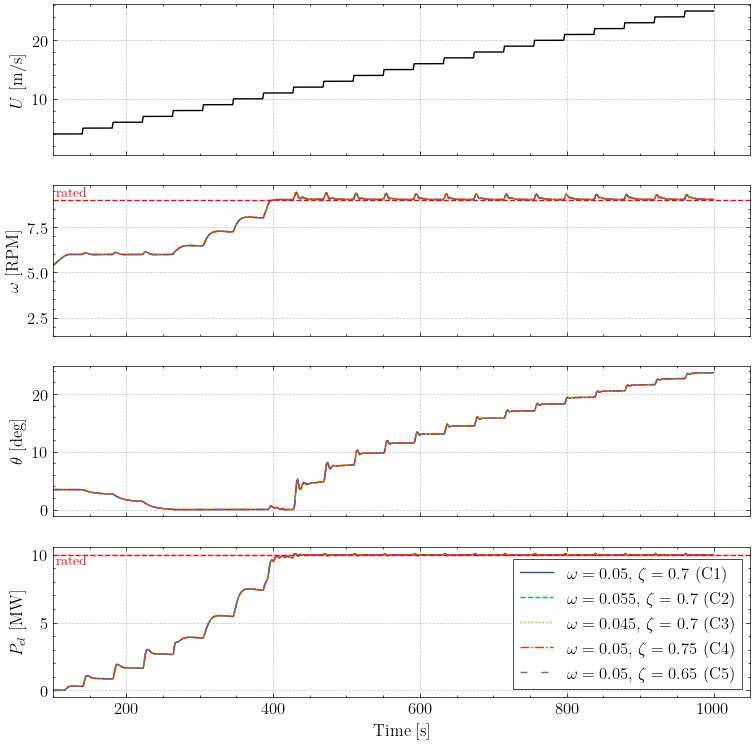

In [2]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_neo_step_wind_C1.hdf5',
    '../res/BB_neo_step_wind_C2.hdf5',
    '../res/BB_neo_step_wind_C3.hdf5',
    '../res/BB_neo_step_wind_C4.hdf5',
    '../res/BB_neo_step_wind_C5.hdf5'
]

labels = [
    r'$\omega=0.05$, $\zeta=0.7$ (C1)',
    r'$\omega=0.055$, $\zeta=0.7$ (C2)',
    r'$\omega=0.045$, $\zeta=0.7$ (C3)',
    r'$\omega=0.05$, $\zeta=0.75$ (C4)',
    r'$\omega=0.05$, $\zeta=0.65$ (C5)'
]

linestyles = [
    'solid',
    'dashed',
    'dotted',
    'dashdot',
    (0, (5, 10))    # loosely dashed
]


savename = 'plots/controller_stability_evaluation.pdf'

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t, linestyle in zip(omega_data, time_data, linestyles):
    axs[1].plot(t, omega, linestyle = linestyle)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)
# Add horizontal line and label for Omega
axs[1].axhline(y=9.042, color='r', linestyle='--', linewidth=1)
axs[1].text(105, 9.042, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Plot Pitch on the third subplot
for pitch, t, linestyle in zip(pitch_data, time_data, linestyles):
    axs[2].plot(t, pitch, linestyle = linestyle)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for pelec, t, linestyle in zip(pelec_data, time_data, linestyles):
    axs[3].plot(t, pelec, linestyle = linestyle)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)
# Add horizontal line and label for P_elec
axs[3].axhline(y=10, color='r', linestyle='--', linewidth=1)
axs[3].text(105, 9, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Legend
legend = axs[3].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='best')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
# plt.savefig(savename, dpi=300, bbox_inches='tight')


# For viridis of 5 lines

In [3]:
import matplotlib.cm as cm
viridis = cm.get_cmap('viridis_r', 3)  # Get 5 distinct colors from the colormap

C:\Users\jason\AppData\Local\Temp\ipykernel_8644\1631113684.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis_r', 3)  # Get 5 distinct colors from the colormap


# Natural frequency comparison

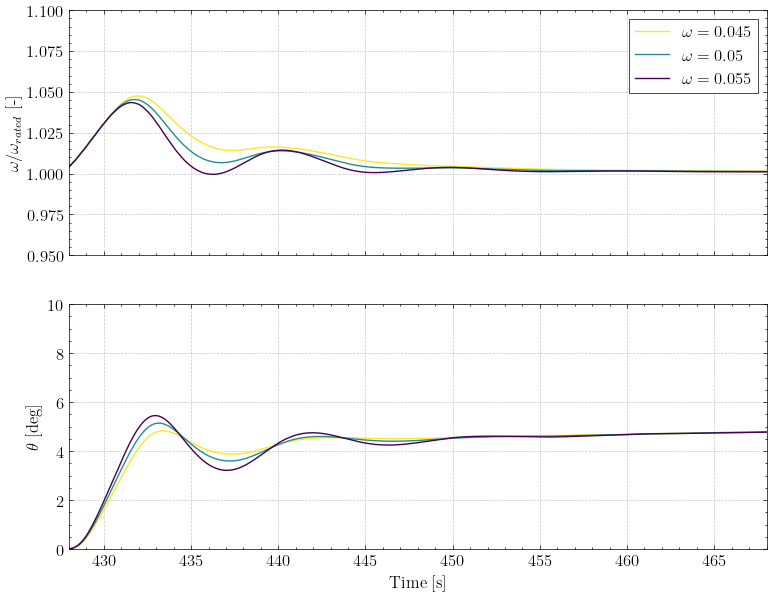

In [5]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_neo_step_wind_C3.hdf5',
    '../res/BB_neo_step_wind_C1.hdf5',
    '../res/BB_neo_step_wind_C2.hdf5'
]


labels = [
    r'$\omega=0.045$',
    r'$\omega=0.05$',
    r'$\omega=0.055$'
]

savename = 'plots/ctrl_omega_comparison.pdf'

# For Non-Dim
omega_rated = 9.042
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated, color=viridis(i))
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch, color=viridis(i))
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# Damping comparison

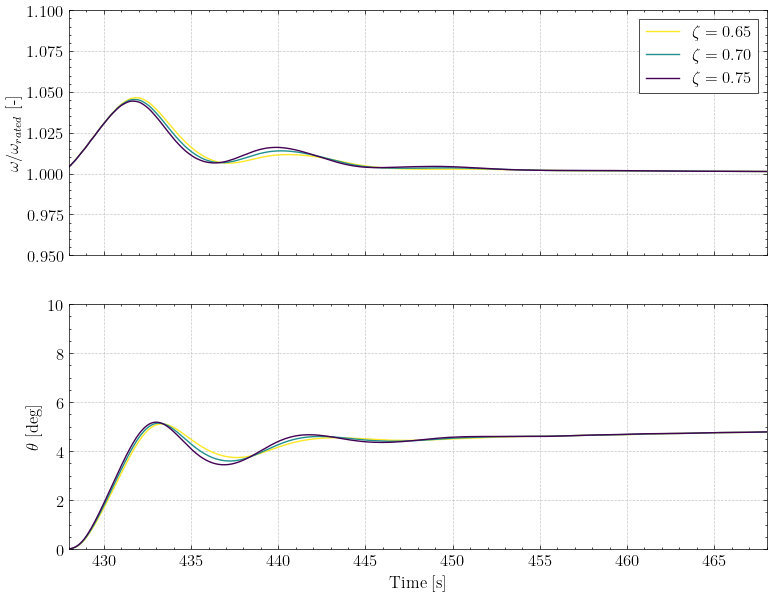

In [6]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_neo_step_wind_C5.hdf5',
    '../res/BB_neo_step_wind_C1.hdf5',
    '../res/BB_neo_step_wind_C4.hdf5'
]


labels = [
    r'$\zeta=0.65$',
    r'$\zeta=0.70$',
    r'$\zeta=0.75$'
]

savename = 'plots/ctrl_damping_comparison.pdf'

# For Non-Dim
omega_rated = 9.042
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated, color=viridis(i))
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch, color=viridis(i))
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# Comparison of all the tunings

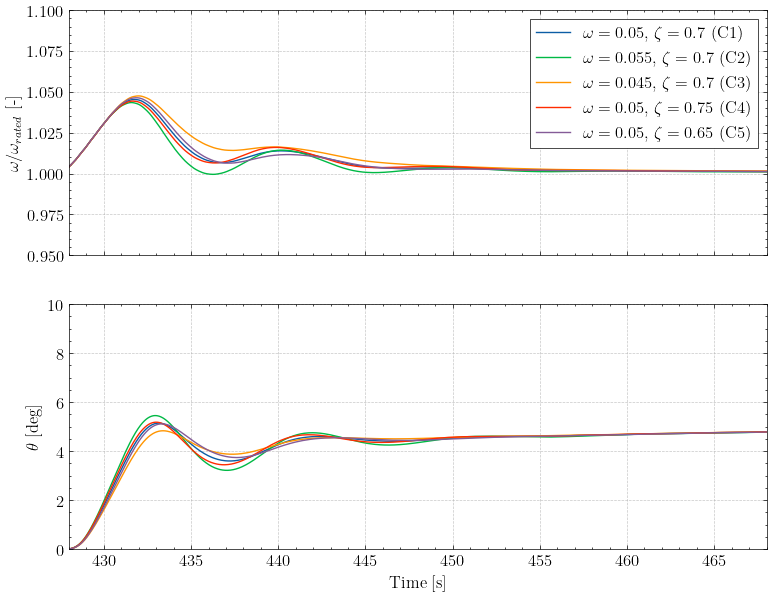

In [6]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_neo_step_wind_C1.hdf5',
    '../res/BB_neo_step_wind_C2.hdf5',
    '../res/BB_neo_step_wind_C3.hdf5',
    '../res/BB_neo_step_wind_C4.hdf5',
    '../res/BB_neo_step_wind_C5.hdf5'
]

labels = [
    r'$\omega=0.05$, $\zeta=0.7$ (C1)',
    r'$\omega=0.055$, $\zeta=0.7$ (C2)',
    r'$\omega=0.045$, $\zeta=0.7$ (C3)',
    r'$\omega=0.05$, $\zeta=0.75$ (C4)',
    r'$\omega=0.05$, $\zeta=0.65$ (C5)'
]

savename = 'plots/ctrl_tunings_comparison.pdf'

# For Non-Dim
omega_rated = 9.042
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated)
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch)
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# Impact on the loads

Targeting the Tower base side-side and the in-plane blade root moment

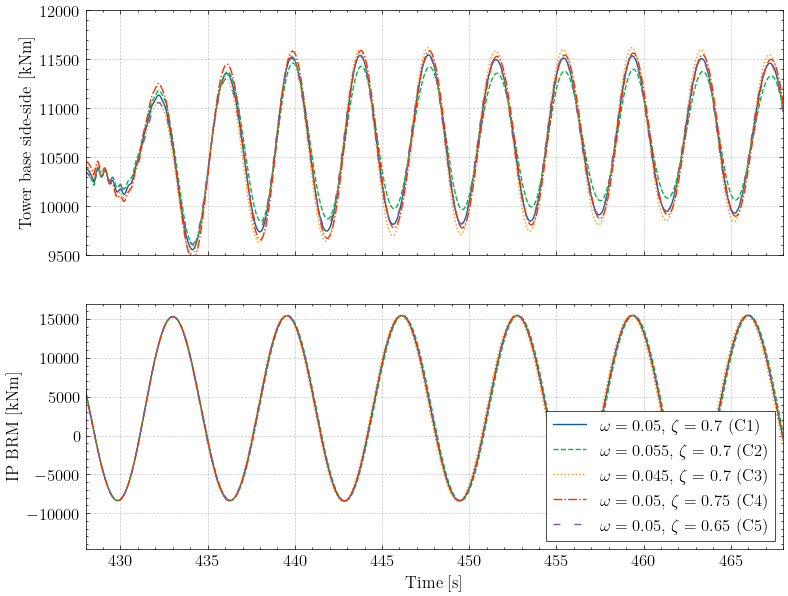

In [7]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_neo_step_wind_C1.hdf5',
    '../res/BB_neo_step_wind_C2.hdf5',
    '../res/BB_neo_step_wind_C3.hdf5',
    '../res/BB_neo_step_wind_C4.hdf5',
    '../res/BB_neo_step_wind_C5.hdf5'
]

labels = [
    r'$\omega=0.05$, $\zeta=0.7$ (C1)',
    r'$\omega=0.055$, $\zeta=0.7$ (C2)',
    r'$\omega=0.045$, $\zeta=0.7$ (C3)',
    r'$\omega=0.05$, $\zeta=0.75$ (C4)',
    r'$\omega=0.05$, $\zeta=0.65$ (C5)'
]

linestyles = [
    'solid',
    'dashed',
    'dotted',
    'dashdot',
    (0, (5, 10))    # loosely dashed
]

savename = 'plots/ctrl_loads_comparison.pdf'

# For Non-Dim
# omega_rated = 8.036
# x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []
TbSS_data = []
IpBRM_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    TbSS_idx = np.where(['My coo: tower' in name for name in names])[0][0]
    IpBRM_idx = np.where(['My coo: hub1' in name for name in names])[0][0]

    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)
    TbSS_data.append(h2res.data[:, TbSS_idx])
    IpBRM_data.append(h2res.data[:, IpBRM_idx])

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot TBSS on the first subplot
for TbSS, t, linestyle in zip(TbSS_data, time_data, linestyles):
    axs[0].plot(t, TbSS, linestyle=linestyle)
axs[0].set_ylabel('Tower base side-side [kNm]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95e4, 1.2e4)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot IpBRM on the second subplot
for IpBRM, t, linestyle in zip(IpBRM_data, time_data, linestyles):
    axs[1].plot(t, IpBRM, linestyle=linestyle)
axs[1].set_ylabel('IP BRM [kNm]')
axs[1].set_xlim(left=x_start, right=x_end)
# axs[1].set_ylim(1.51e4, 1.55e4)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[1].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='lower right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')